In [780]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Import recall score to calculate sensitivity/recall
from sklearn.metrics import recall_score

# Import precision score to calculate precision
from sklearn.metrics import precision_score

# Overall accuracy: train_test_split function
from sklearn.model_selection import train_test_split

# Accuracy Score: Added step onto train test split to do Cross Validation: get better sense of accuracy
from sklearn.model_selection import cross_val_score

In [781]:
plt.rcParams['figure.figsize'] = (50.0, 20.0)
plt.rcParams.update({'font.size': 22})

In [782]:
# Grab and process the raw data - test
data_path = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/sentiment-labelled-sentences/amazon_cells_labelled.txt"
            )           
amazon_cells_raw = pd.read_csv(data_path, delimiter= '\t', header=None)


## Train Data: Amazon

In [783]:
# Name the columns
amazon_cells_raw.columns = ['review', 'positive']

In [784]:
# Look for keywords that might intuitively indicate positive Amazon review and create feature variable keywords

amazon_keywords = ['good', 'very good', 'great', 'excellent', 'quality', 'highly']

for amazon_key in amazon_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_cells_raw[str(amazon_key)] = amazon_cells_raw.review.str.contains(
        ' ' + str(amazon_key) + ' ',
        case=False
    )

In [785]:
amazon_cells_raw_pos = amazon_cells_raw.loc[amazon_cells_raw['positive'] == 1]
amazon_cells_raw_neg = amazon_cells_raw.loc[amazon_cells_raw['positive'] == 0]
amazon_cells_raw_pos.head()


,review,positive,good,very good,great,excellent,quality,highly
1,"Good case, Excellent value.",1,False,False,False,True,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False
10,And the sound quality is great.,1,False,False,False,False,True,False


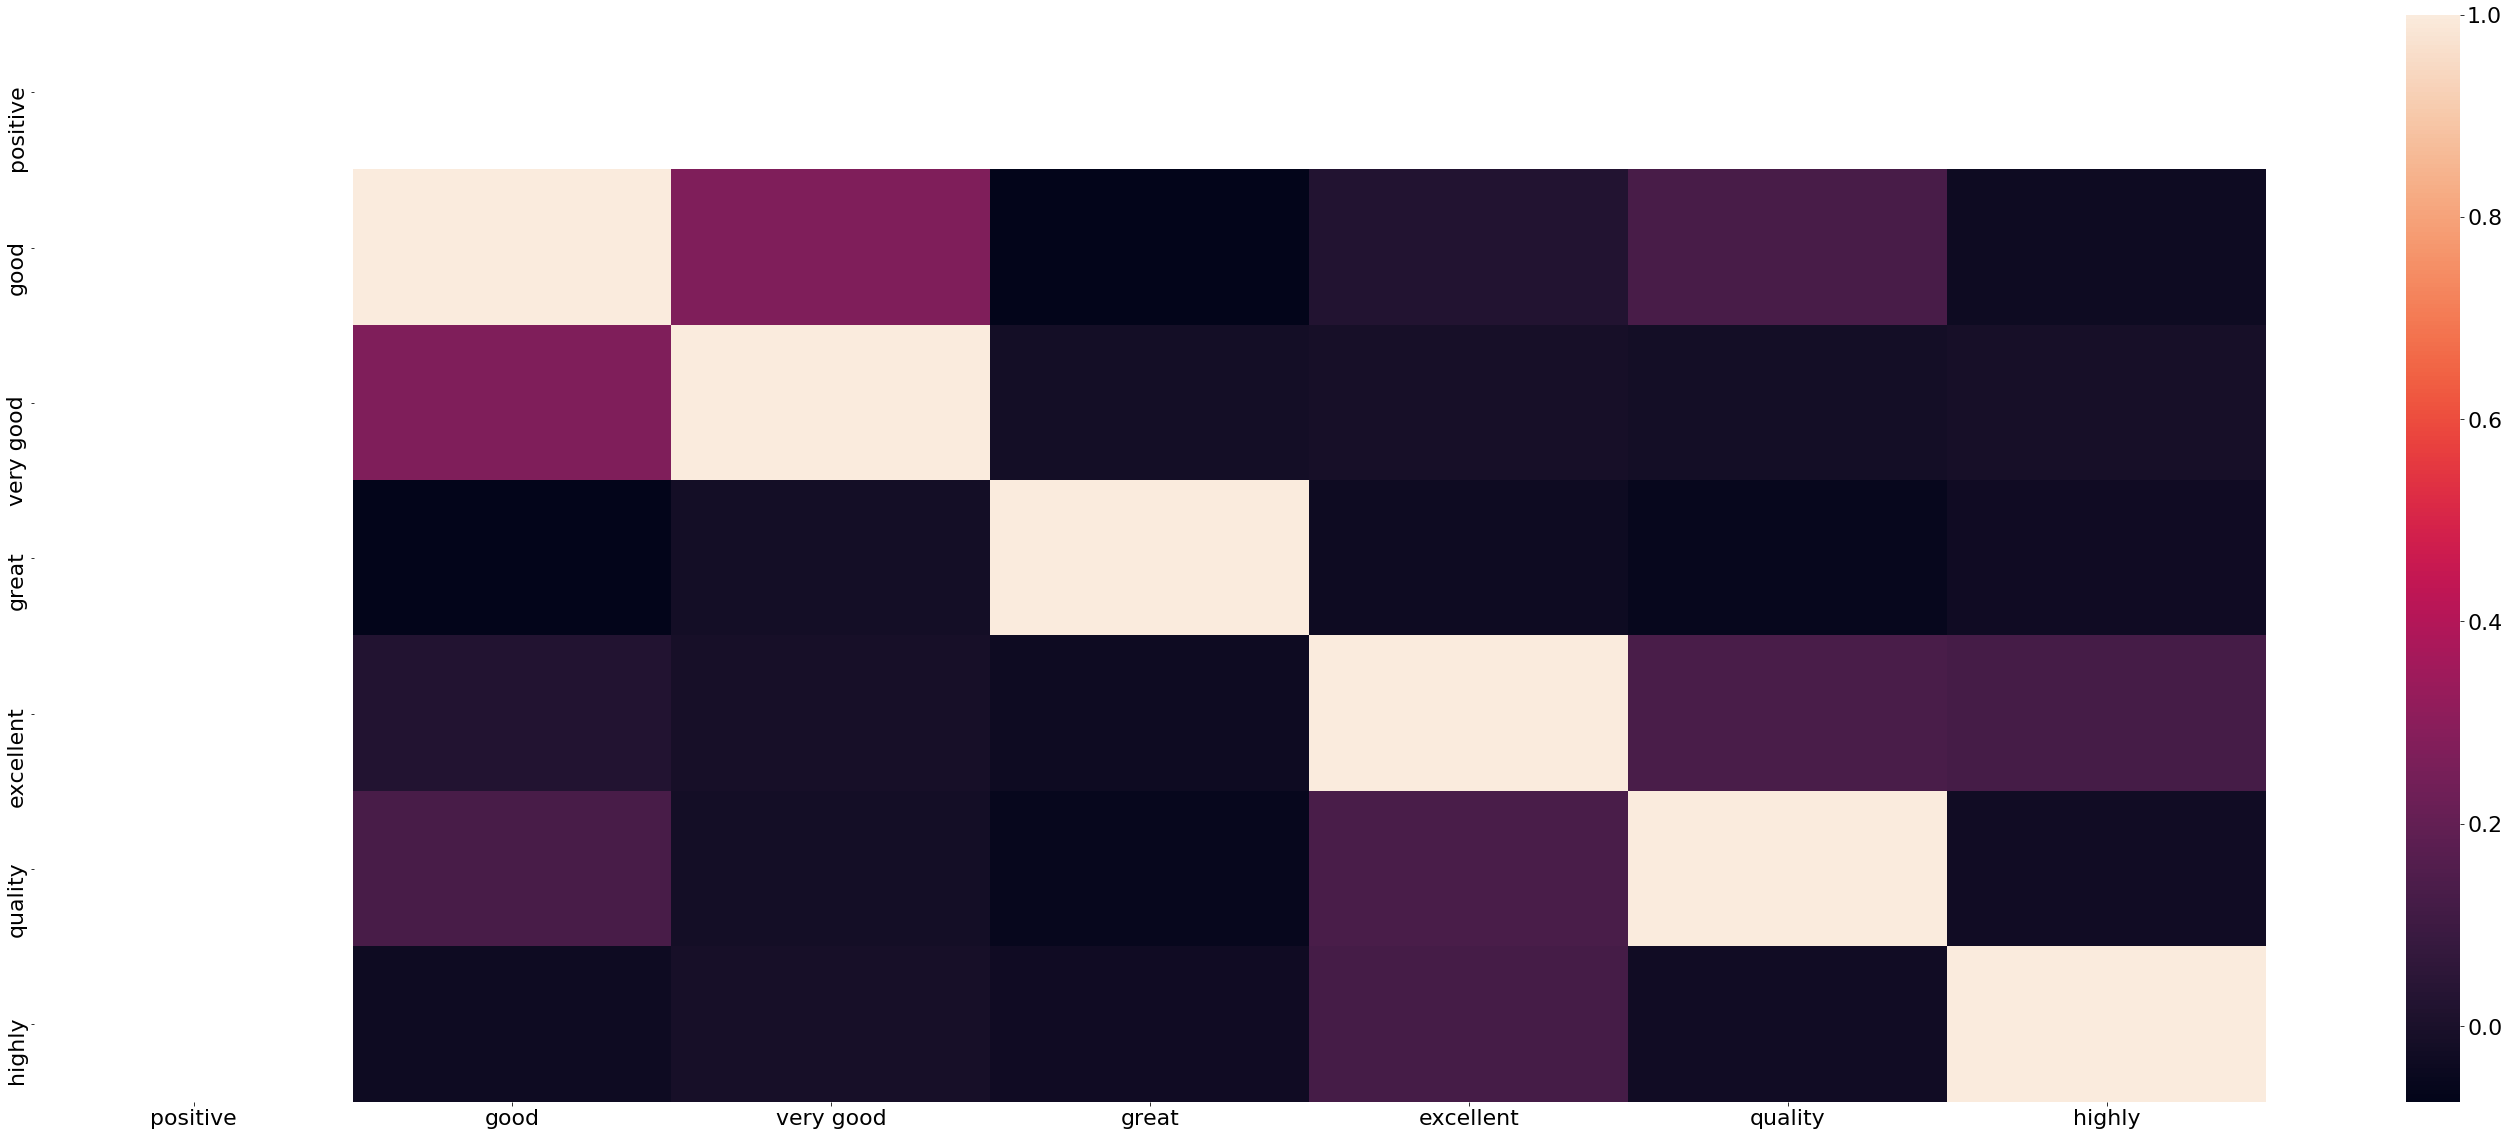

In [786]:
sns.heatmap(amazon_cells_raw_pos.corr());

In [787]:
# Identify the data using 
data_amazon = amazon_cells_raw[keywords]
target_amazon = amazon_cells_raw['positive']

In [788]:

# Instantiate our model and store it in a new variable.
bnb_amazon = BernoulliNB()

# Fit our model to the data.
bnb_amazon = bnb.fit(data_amazon, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


# Fit Bernoulli model to the IMDB Initial data and target
bnb_fit_amazon = bnb.fit(data_amazon, target_amazon)

# Classify, storing the result in a new variable.
y_pred_amazon = bnb.predict(data_amazon)

#BNB Fit Score Initial:
X_train, X_test, y_train, y_test = train_test_split(
   data_amazon, target_amazon, test_size=0.3, random_state=0)

print('Bernoulli Model Accuracy Score AMAZON - Test Size = 30%: ', bnb_fit_amazon.score(X_test, y_test))

print()

# Accuracy Score Initial:
print('AMAZON accuracy_score Accuracy Score: ', accuracy_score(target_amazon, y_pred_amazon))

print()

# Cross Validation Accuracy Score Initial:
cross_validation_amazon_scores = cross_val_score(bnb_fit_amazon, data_amazon, target_amazon, cv=5)

print('AMAZON Cross Validation Scores:\n', cross_validation_amazon_scores)

print()

# Initial confusion matrix:
confusion_amazon = confusion_matrix(target_amazon, y_pred_amazon)
print('AMAZON Confusion Matrix: \n', confusion_amazon)

print(
    '\nTrue Positve: ', confusion_amazon[1,1],
    '\nTrue Negative: ', confusion_amazon[0,0]
)

print(
      '\nFalse Positive: ', confusion_amazon[0,1],
      '\nFalse Negative: ', confusion_amazon[1,0],    
)

print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_amazon = confusion_amazon[1, 1]

# True Negatives
TN_amazon = confusion_amazon[0, 0]

# False Positives
FP_amazon = confusion_amazon[0, 1]

# False Negatives
FN_amazon = confusion_amazon[1, 0]


# Calculate Sensitivity and Specificity - AMAZON
print('AMAZON Sensitivity (true pos): ', recall_score(target_amazon, y_pred_amazon, average=None)[0], '%')
print('AMAZON Specificity (true neg): ', recall_score(target_amazon, y_pred_amazon, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('Average Precision Score: ', precision_score(target_amazon, y_pred_amazon, average='binary'))

print()

# Mislabelled data
print('Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_amazon != y_pred_amazon).sum(),
    amazon_cells_raw_pos.shape[0]
    
))

print()

# Correctly labelled data
print('Correctly Labelled Points:')
print("{} out of {}".format(
    (target_amazon == y_pred_amazon).sum(),
    data_amazon.shape[0]
    
))

# Correctly labelled data
print('\nCorrectly Labeled Predictors of AMAZON Positive Reviews:\n')
print(amazon_cells_raw_pos[amazon_keywords].sum().sort_values(ascending=False))

# Inorrectly labelled data
print('\nInorrectly Labeled Predictors of AMAZON Positive Reviews:\n')
print(amazon_cells_raw_neg[amazon_keywords].sum().sort_values(ascending=False))



Number of mislabeled points out of a total 1000 points : 428
Bernoulli Model Accuracy Score AMAZON - Test Size = 30%:  0.57

AMAZON accuracy_score Accuracy Score:  0.572

AMAZON Cross Validation Scores:
 [0.59  0.57  0.585 0.57  0.545]

AMAZON Confusion Matrix: 
 [[475  25]
 [403  97]]

True Positve:  97 
True Negative:  475

False Positive:  25 
False Negative:  403

AMAZON Sensitivity (true pos):  0.95 %
AMAZON Specificity (true neg):  0.194 %

Average Precision Score:  0.7950819672131147

Incorrectly Labelled Points:
428 out of 500

Correctly Labelled Points:
572 out of 1000

Correctly Labeled Predictors of AMAZON Positive Reviews:

good         38
great        32
quality      21
excellent     8
highly        7
very good     3
dtype: int64

Inorrectly Labeled Predictors of AMAZON Positive Reviews:

quality      12
good         12
highly        1
great         1
excellent     0
very good     0
dtype: int64


## Hold Out Data: IMDB - initial

In [789]:
# Re-run this cell if you add/delte pos_imdb_keywords in next cell
# hold out IMDB data
data_path_initial = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/sentiment-labelled-sentences/imdb_labelled.txt"
            )
imdb_cells_raw_initial = pd.read_csv(data_path_initial, delimiter= '\t', header=None)

# Name the imdb columns
imdb_cells_raw_initial.columns = ['imdb_review', 'imdb_positive']
imdb_cells_raw_initial.head()

,imdb_review,imdb_positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [790]:
# Look for keywords that might intuitively indicate positive IMDB review and create feature variable keywords
# if you change words here, have to update data, so including data path here

initial_imdb_keywords = ['good', 'very good', 'great', 'excellent', 'quality', 'highly']

for imdb_initial_key in initial_imdb_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_cells_raw_initial[str(imdb_initial_key)] = imdb_cells_raw_initial.imdb_review.str.contains(
        ' ' + str(imdb_initial_key) + ' ',
        case=False
    )

In [791]:
imdb_cells_raw_initial_pos = imdb_cells_raw_initial.loc[imdb_cells_raw_initial['imdb_positive'] == 1]
imdb_cells_raw_initial_neg = imdb_cells_raw_initial.loc[imdb_cells_raw_initial['imdb_positive'] == 0]
imdb_cells_raw_initial_pos.head()

,imdb_review,imdb_positive,good,very good,great,excellent,quality,highly
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,True,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False
10,And those baby owls were adorable.,1,False,False,False,False,False,False
11,The movie showed a lot of Florida at it's best...,1,False,False,False,False,False,False


In [792]:
# Identify the data using 
data_imdb_initial = imdb_cells_raw_initial[initial_imdb_keywords]
target_imdb_initial = imdb_cells_raw_initial['imdb_positive']
data_imdb_initial.head()

,good,very good,great,excellent,quality,highly
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [793]:
# Fit Bernoulli model to the IMDB Initial data and target
bnb_fit_imdb_initial = bnb.fit(data_imdb_initial, target_imdb_initial)

# Classify, storing the result in a new variable.
y_pred_initial = bnb.predict(data_imdb_initial)

#BNB Fit Score Initial:
X_train, X_test, y_train, y_test = train_test_split(
   data_imdb_initial, target_imdb_initial, test_size=0.3, random_state=0)

print('Applying features from Amazon Reviews to IMDB Reviews to see how well they generalize.')
print()

print('Bernoulli Model Accuracy Score IMDB Initial - Test Size = 30%: ', bnb_fit_imdb_initial.score(X_test, y_test))

print()

# Accuracy Score Initial:
print('IMDB Initial accuracy_score Accuracy Score: ', accuracy_score(target_imdb_initial, y_pred_initial))
print('---> AMAZON accuracy_score Accuracy Score: ', accuracy_score(target_amazon, y_pred_amazon))

print()

# Cross Validation Accuracy Score Initial:
cross_validation_imdb_initial_scores = cross_val_score(bnb_fit_imdb_initial, data_imdb_initial, target_imdb_initial, cv=5)

print('IMDB Initial Cross Validation Scores:\n', cross_validation_imdb_initial_scores)

print()

# Initial confusion matrix:
confusion_initial = confusion_matrix(target_imdb_initial, y_pred_initial)
print('IMDB Initial Confusion Matrix: \n', confusion_initial)

print(
    '\nIMDB Initial True Positve: ', confusion_initial[1,1],
    '\n--->AMAZON True Positve: ', confusion_amazon[1,1]
)

print(
    '\nIMDB Initial True Negative: ', confusion_initial[0,0],
    '\n--->AMAZON True Negative: ', confusion_amazon[0,0]
)

print(
    '\nIMDB Initial False Positive: ', confusion_initial[0,1],
    '\n--->AMAZON False Positive: ', confusion_amazon[0,1]
)

print(
    '\nIMDB Initial False Negative: ', confusion_initial[1,0],
    '\n--->AMAZON False Negative: ', confusion_amazon[1,0]
)


print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_initial = confusion_initial[1, 1]

# True Negatives
TN_initial = confusion_initial[0, 0]

# False Positives
FP_initial = confusion_initial[0, 1]

# False Negatives
FN_initial = confusion_initial[1, 0]


# Calculate Sensitivity and Specificity - Initial
print('IMDB Initial Sensitivity (true pos): ', recall_score(target_imdb_initial, y_pred_initial, average=None)[0], '%')
print('---> AMAZON Sensitivity (true pos): ', recall_score(target_amazon, y_pred_amazon, average=None)[0], '%')

print()

print('IMDB Initial Specificity (true neg): ', recall_score(target_imdb_initial, y_pred_initial, average=None)[1], '%')
print('--->AMAZON Specificity (true neg): ', recall_score(target_amazon, y_pred_amazon, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('IMDB INitial Average Precision Score: ', precision_score(target_imdb_initial, y_pred_initial, average='binary'))

print()

# Mislabelled data
print('IMDB Initial Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_imdb_initial != y_pred_initial).sum(),
    data_imdb_pos.shape[0]
    
))

print()

# Correctly labelled data
print('IMDB Initial Correctly Labelled Points:')
print("{} out of {}".format(
    (target_imdb_initial == y_pred_initial).sum(),
    data_imdb_play.shape[0]
    
))

# Correctly labelled data
print('\nCorrectly Labeled Predictors of IMDB Initial Positive Reviews:\n')
print(imdb_cells_raw_initial_pos[initial_imdb_keywords].sum().sort_values(ascending=False))

# Correctly labelled data
print('\nIncorrectly Labeled Predictors of IMDB Initial Positive Reviews:\n')
print(imdb_cells_raw_initial_neg[initial_imdb_keywords].sum().sort_values(ascending=False))



Applying features from Amazon Reviews to IMDB Reviews to see how well they generalize.

Bernoulli Model Accuracy Score IMDB Initial - Test Size = 30%:  0.56

IMDB Initial accuracy_score Accuracy Score:  0.5347593582887701
---> AMAZON accuracy_score Accuracy Score:  0.572

IMDB Initial Cross Validation Scores:
 [0.49668874 0.56666667 0.55033557 0.56375839 0.4966443 ]

IMDB Initial Confusion Matrix: 
 [[345  17]
 [331  55]]

IMDB Initial True Positve:  55 
--->AMAZON True Positve:  97

IMDB Initial True Negative:  345 
--->AMAZON True Negative:  475

IMDB Initial False Positive:  17 
--->AMAZON False Positive:  25

IMDB Initial False Negative:  331 
--->AMAZON False Negative:  403

IMDB Initial Sensitivity (true pos):  0.9530386740331491 %
---> AMAZON Sensitivity (true pos):  0.95 %

IMDB Initial Specificity (true neg):  0.14248704663212436 %
--->AMAZON Specificity (true neg):  0.194 %

IMDB INitial Average Precision Score:  0.7638888888888888

IMDB Initial Incorrectly Labelled Points:
3

## Hold Out Data: IMDB - playing with keywords

In [794]:
# Re-run this cell if you add/delte pos_imdb_keywords in next cell
# hold out IMDB data
data_path_play = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/sentiment-labelled-sentences/imdb_labelled.txt"
            )
imdb_cells_raw_play = pd.read_csv(data_path_play, delimiter= '\t', header=None)

# Name the imdb columns
imdb_cells_raw_play.columns = ['imdb_review', 'imdb_positive']
imdb_cells_raw_play.head()


,imdb_review,imdb_positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [795]:
# Look for keywords that might intuitively indicate positive IMDB review and create feature variable keywords
# if you change words here, have to refresh data in order for cells below to function properly.

pos_imdb_keywords = ['best', 'good', 'very good', 'great', 'excellent', 'highly', 'quality', 'interesting', 'entertaining',
                     'terrific', 'wonderful', '10', 'incredible', 'gem', 'adorable', 'perfect', 'funny', 'lovely', 'fresh',
                     'pleased', 'amazing', 'cool', 'truly'
                    ]

for imdb_initial_key_pos in pos_imdb_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_cells_raw_play[str(imdb_initial_key_pos)] = imdb_cells_raw_play.imdb_review.str.contains(
        ' ' + str(imdb_initial_key_pos) + ' ',
        case=False
    )


In [796]:
# Don't re-run this cell!!!
imdb_cells_raw_play_pos = imdb_cells_raw_play.loc[imdb_cells_raw_play['imdb_positive'] == 1]
imdb_cells_raw_play_neg = imdb_cells_raw_play.loc[imdb_cells_raw_play['imdb_positive'] == 0]
imdb_cells_raw_play_pos.head()

,imdb_review,imdb_positive,best,good,very good,great,excellent,highly,quality,interesting,...,gem,adorable,perfect,funny,lovely,fresh,pleased,amazing,cool,truly
4,The best scene in the movie was when Gerardo i...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,And those baby owls were adorable.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,The movie showed a lot of Florida at it's best...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [797]:
# Define the data and target 
data_imdb_play = imdb_cells_raw_play[pos_imdb_keywords]
target_imdb_play = imdb_cells_raw_play['imdb_positive']
data_imdb_play.head()


,best,good,very good,great,excellent,highly,quality,interesting,entertaining,terrific,...,gem,adorable,perfect,funny,lovely,fresh,pleased,amazing,cool,truly
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [798]:
# Fit Bernoulli model to the IMDB play data and target
bnb_fit_imdb_play = bnb.fit(data_imdb_play, target_imdb_play)

# Classify, storing the result in a new variable.
y_pred_play = bnb.predict(data_imdb_play)

#BNB Fit Score:
X_train, X_test, y_train, y_test = train_test_split(
   data_imdb_play, target_imdb_play, test_size=0.3, random_state=0)

print('Bernoulli Model Accuracy Score Test Size = 30%: ', bnb_fit_imdb_play.score(X_test, y_test))

print()

# Accuracy Score:
print('IMDB Play accuracy_score Accuracy Score: ', accuracy_score(target_imdb_play, y_pred_play))

print()

# Cross Validation Accuracy Score:
cross_validation_imdb_play_scores = cross_val_score(bnb_fit_imdb_play, data_imdb_play, target_imdb_play, cv=5)

print('IMDB Play Cross Validation Scores:\n', cross_validation_imdb_play_scores)

print()

# Play confusion matrix:
confusion_play = confusion_matrix(target_imdb_play, y_pred_play)
print('Play Confusion Matrix: \n', confusion_play)

print(
    '\nIMDB Play True Positve: ', confusion_play[1,1],
    '\n---> IMDB Initial True Positve: ', confusion_initial[1,1]
)
print(
    '\nIMDB Play True Negative: ', confusion_play[0,0],
    '\n---> IMDB Initial True Negative: ', confusion_initial[0,0]
)

print(
    '\nIMDB Play False Positive: ', confusion_play[0,1],
    '\n---> IMDB Initial False Positive: ', confusion_initial[0,1]
)

print(
    '\nIMDB Play False Negative: ', confusion_play[1,0],
    '\n---> IMDB Initial False Negative: ', confusion_initial[1,0], 
)

print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_play = confusion_play[1, 1]

# True Negatives
TN_play = confusion_play[0, 0]

# False Positives
FP_play = confusion_play[0, 1]

# False Negatives
FN_play = confusion_play[1, 0]


# Calculate Sensitivity and Specificity
print('IMDB Play Sensitivity (true pos): ', recall_score(target_imdb_play, y_pred_play, average=None)[0], '%')
print('--> IMDB Initial Sensitivity (true pos): ', recall_score(target_imdb_initial, y_pred_initial, average=None)[0], '%')

print()

print('IMDB Play Specificity (true neg): ', recall_score(target_imdb_play, y_pred_play, average=None)[1], '%')
print('--> IMDB Initial Specificity (true neg): ', recall_score(target_imdb_initial, y_pred_initial, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('Average Precision Score: ', precision_score(target_imdb_play, y_pred_play, average='binary'))

print()

# Mislabelled data
print('Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_imdb_play != y_pred_play).sum(),
    data_imdb_pos.shape[0]
    
))

print()

# Correctly labelled data
print('Correctly Labelled Points:')
print("{} out of {}".format(
    (target_imdb_play == y_pred_play).sum(),
    data_imdb_play.shape[0]
    
))

# Correctly labelled data
print('\nTrue Positives: Correctly Labeled Predictors of Positive Reviews:\n')
print(imdb_cells_raw_play_pos[pos_imdb_keywords].sum().sort_values(ascending=False))

# Incorrectly labelled data
print('\nFalse Positives: Incorrectly Labeled Predictors of Positive Reviews:\n')
print(imdb_cells_raw_play_neg[pos_imdb_keywords].sum().sort_values(ascending=False))

Bernoulli Model Accuracy Score Test Size = 30%:  0.6444444444444445

IMDB Play accuracy_score Accuracy Score:  0.6176470588235294

IMDB Play Cross Validation Scores:
 [0.58278146 0.62666667 0.60402685 0.6442953  0.58389262]

Play Confusion Matrix: 
 [[341  21]
 [265 121]]

IMDB Play True Positve:  121 
---> IMDB Initial True Positve:  55

IMDB Play True Negative:  341 
---> IMDB Initial True Negative:  345

IMDB Play False Positive:  21 
---> IMDB Initial False Positive:  17

IMDB Play False Negative:  265 
---> IMDB Initial False Negative:  331

IMDB Play Sensitivity (true pos):  0.9419889502762431 %
--> IMDB Initial Sensitivity (true pos):  0.9530386740331491 %

IMDB Play Specificity (true neg):  0.3134715025906736 %
--> IMDB Initial Specificity (true neg):  0.14248704663212436 %

Average Precision Score:  0.852112676056338

Incorrectly Labelled Points:
286 out of 748

Correctly Labelled Points:
462 out of 748

True Positives: Correctly Labeled Predictors of Positive Reviews:

good  

## Observations after applying same features from Amazon data to IMDB data and then comparing IMDB initial data with increased features in IMDB play data:

### Applying same features from Amazon data to IMDB data:

- few features, but they generalized fairly well for being so basic
- biggest changes was in specificity, change from 19% for Amazon data to 14% for IMDB data (overall low specificity)
- likely that increase in features might also lower specificity the more specific features get for Amazon review data
- no apparent overfit, underfitting appears to be more likely at this point
- best performers are general enough to apply in both situations, but specific enough to be relevant to the data in each case

### Increased features from IMDB initial to IMDB play:

- slightly decreased sensitivity from 95% to 94%
- doubled specificity from 14% to 31%
- the feature "good" had a high number of incorrect predictions: words that can be modified to change meaning have a great impact on specificity in other words "good" could come from a review that states "not a good" and would be incorrectly predicted
- it is likely that additional features would need to be added to continue to improve specificity